In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.datasets import load_digits as ld

from matplotlib import colormaps

def GetColors(N, cmap_name='rainbow'):
    '''Return an array of N equally spaced colors from the colormap'''
    # Get the colormap
    cmap = colormaps[cmap_name]
    # Get N equally spaced numbers between 0 and 1
    n = np.linspace(0,1,N)
    return cmap(n)

def PlotGroups(points, labels, colors, figsize=(3,3)):
    '''Make a 2-d scatter plot of data, with points colored according to a given label
        Inputs:
            points: A 2-d array
            colors: Either an RGB or RGBA array, or color names
    
    '''
    if type(points) == type(pd.DataFrame()):
        points = points.values
    
    plt.figure(figsize=figsize)
    
    for i, yi in enumerate(np.unique(labels)):
        idx = (labels==yi)
        plt.scatter(points[idx,0], points[idx,1],
                    alpha=0.5, ec='k', color=colors[i], label=yi)
    
    plt.axis('equal')
    plt.legend(loc='center left', bbox_to_anchor=[1,0.5]) # Put the legend outside of the plot halfway up
    #plt.show()
    return plt.gcf(), plt.gca()


In [47]:
#df

In [49]:
# True for the phylum data, False for the digit data
if False:
    df = pd.read_csv('202109_phylum_with_site.csv')
    X = df.iloc[:, 4:]
    y = df['site']
    X.head(3)
else:
    X,y = ld(as_frame=True, return_X_y=True)

In [50]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [51]:
pca = PCA()
Xp = pca.fit_transform(X)
evr = pca.explained_variance_ratio_

In [52]:
n_sites = len(np.unique(y))
colors = GetColors(n_sites)

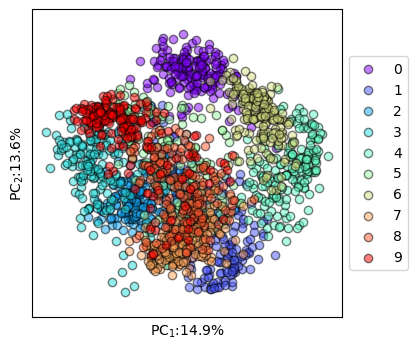

In [53]:
PlotGroups(Xp, y, colors, figsize=(4,4))
plt.xlabel('PC$_1$:' + format(evr[0]*100, '.1f') + '%')
plt.ylabel('PC$_2$:' + format(evr[1]*100, '.1f') + '%')
plt.xticks([])
plt.yticks([])
plt.show()

In [54]:
tsne = TSNE(random_state=42, perplexity=30)
Xt = tsne.fit_transform(X)

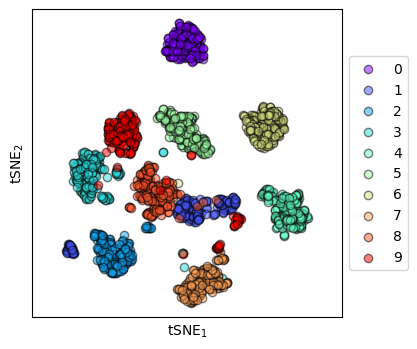

In [55]:
PlotGroups(Xt, y, colors, figsize=(4,4))
plt.xlabel('tSNE$_1$')
plt.ylabel('tSNE$_2$')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# tSNE reference:
# https://distill.pub/2016/misread-tsne/